# Trabajo Computacional 1. Ejercicio 4.a (i-iv)


**4)** Asortatividad

*a.* Considere la red de colaboraciones científicas (*netscience.gml*) y la red de internet (*as-july06.gml*). Analice si nodos de alto grado tienden a conectarse con nodos de alto grado o por el contrario suelen conectarse a nodos de bajo grado? (i.e la red es asortativa o disortativa respecto al grado?). Para ello:

*i.* Determine, para nodos de grado k, cuánto vale en media el grado de sus vecinos.

In [41]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
from scipy import stats
import math
from scipy import optimize


In [14]:
H=nx.read_gml("data/netscience.gml")
G=nx.read_gml("data/as-22july06.gml")

Para determinar el grado medio de los vecinos de un dado nodo de cada red, se trabajó con una función definida sobre la variable Grafo, permitiendo calcularlo para cada red. Primero creamos dos funciones que usaremos en la función principal: la primera creará una lista que contenga la información [Grado del nodo i, nodo i] para todos los nodos de la red; la segunda da el grado máximo en cada red, esto permitirá hacer un barrido en los grados de la red para la función principal.

In [15]:
def NodoGrado(Grafo):
    Nodos=[] #lista con grado-nodo
    for n in Grafo.nodes():
        Nodos.append([nx.degree(Grafo,n),n])
    sorted(Nodos)
    return Nodos 

def K_max(Grafo):
    K=[]
    for n in NodoGrado(Grafo):
       K.append(n[0])
    K_max=max(K)
    return K_max #devuelve el grado maximo de la red 

La función principal **k_vec(Grafo)** consiste en primero calcular los vecinos para cada nodo de la lista creada en la función NodoGrado, luego se infirió el grado de los vecinos y se formó una lista con esos valores. Luego se promedió los valores de los vecinos para cada nodo, teniendo en cuenta que podría no tener vecinos. Luego se recorren todos los grados hasta el máximo de cada red y se promedia el valor de los vecinos para los nodos con ese grado, se tiene en cuenta que puede haber valores contemplados en el barrido que no sean grados de la red. La función genera dos listas, una que da grado k y la otra con el grado promedio de los vecinos para el grado k.

In [16]:
def k_vec(Grafo):
    Grado_GradoPromVec=[]
    for n in NodoGrado(Grafo): #NodoGrado devuelve lista con con grado-nodo ordenada de menor a mayor grado 
        Vecinos=nx.all_neighbors(Grafo,n[1]) #me devuelve todos los vecinos del nodo n[1]
        K=nx.degree(Grafo,Vecinos)
        k_vecinos=[]
        for i in K:
            k_vecinos.append(i[1])
        if len(K)!=0: #si el nodo tiene vecinos 
            k_vecinos_promedio=sum(k_vecinos)/len(K)
        else:
            k_vecinos_promedio=0 #si el nodo no tiene vecinos
        Grado_GradoPromVec.append([n[0],k_vecinos_promedio]) #Grado_GradoPromVec es una lista de listas con el grado de un nodo y el promedio del grado de sus correspondientes vecinos 
    k_nn=[]
    k=[]
    for i in range(1,K_max(Grafo)+1):
        a=0
        b=0
        for n in Grado_GradoPromVec: #Grado_GradoPromVec tiene grado de un nodo Y el promedio del grado de sus vecinos 
            if n[0]==i:
                a+=1 #cuento el numero de nodos con un determinado grado k
                b+=n[1] #sumo para nodos de un mismo k, el promedio del grado de sus vecinos 
        if a!=0: #si existen nodos con el grado i (si a es distinto de cero)
            k_nn.append(b/a) #tiene el promedio sobre todos los nodos de grado k del promedio del grado de los vecinos de cada nodo 
            k.append(i) # i es grado, a cada i le corresponde un elemento de k_nn
    return k,k_nn

Se corre la función **k_vec** para las dos redes:

In [17]:
F1=k_vec(H) #red NetScience
F2=k_vec(G) #red Internet 

*ii.*Analizar la tendencia observada en un gráfico que consigne dicho valor $k_{nn}(k)$ como función del grado.

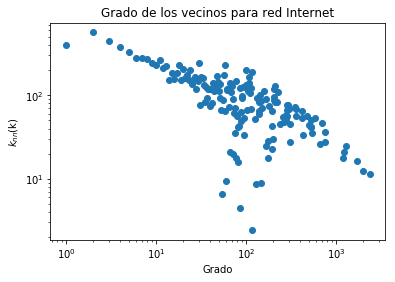

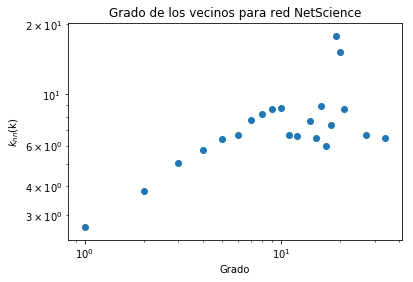

In [40]:
plt.scatter(F2[0],F2[1])
plt.ylabel("$k_{nn}$(k)")
plt.xlabel("Grado")
plt.title('Grado de los vecinos para red Internet')
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.title('Grado de los vecinos para red NetScience')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("$k_{nn}$(k)")
plt.xlabel("Grado")
plt.scatter(F1[0],F1[1])
plt.show()

Pareciera haber una tendencia lineal en ambos gráficos log-log. El primero (*Internet*) pareciera corresponder a una ley de potencias por ejemplo (lineal decreciente en escala logarítmica), si bien hay mucha dispersión en los valores centrales. En la red NetScience se observa un comportamiento lineal creciente (escala log) hasta aproximadamente $10^1$ en la escala x. Después de ese valor se deja de ver el comportamiento lineal y eso se puede deber a que esos puntos corresponden a los hubs, los cuales no son muchos, por lo que no se puede hacer estadistica sobre ellos. 

*iii.* Asumiendo que $𝑘_{𝑛𝑛}(𝑘)=𝑎𝑘^𝜇$, estime el exponente de correlación a partir de realizar una regresión de log$𝑘_{𝑛𝑛}$~log𝑘. Asegurese de graficar el fiteo en el grafico anterior.

Trabajaremos con la red *Internet* que es la que pareciera que corresponde a una ley de potencias. Se estimó el tamaño de la lista de grados presentes en la red para poder hacer un barrido y tomar el logaritmo de los datos y así ajustar por una lineal.

In [21]:
len(F2[0])  #F2[0] era la lista con los grados presentes en la red Internet

161

In [22]:
b=161
F2logx=[]
for i in range(b):
    a=math.log(F2[0][i]) #le tomo logaritmo (EN BASE e) a cada elemento de la lista de grados=F2[0]
    F2logx.append(a)
    
print(F2[0][1],F2logx[1]) #chequeo que sea el logaritmo efectivamente

F2logy=[]
for j in range(b):
    A=math.log(F2[1][j]) #le tomo logaritmo (EN BASE e) a cada elemento de la lista de k_nn=F2[1]
    F2logy.append(A)
    

2 0.6931471805599453


Ahora se trabaja con las nuevas listas de datos. Se calcula la regresión lineal y se registra la ordenada al origen y la pendiente.

In [23]:
reg=sc.stats.linregress(F2logx,F2logy)
print(reg)


LinregressResult(slope=-0.444173551673417, intercept=6.327624965083439, rvalue=-0.6597397256731451, pvalue=1.7779776263191163e-21, stderr=0.04012426735752965)


El intercept=6.327624965083438 está relacionado con la constante de la ley de potencias (es *e* elevado a la ordenada al origen), la slope=-0.4441735516734168 es el exponente de la ley de potencias.

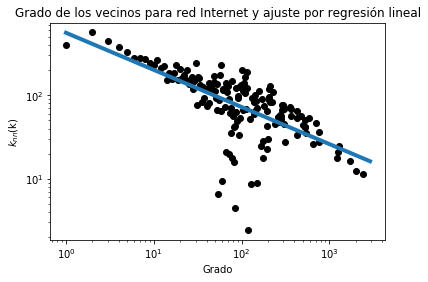

In [39]:
X=np.arange(1,3000,100)

plt.scatter(F2[0],F2[1], color='black') #datos de la red Internet en escala log
plt.xscale('log')
plt.yscale('log')
plt.plot(X,(X**-0.444173551673417)* math.e**6.327624965083439, lw=4)#ajuste con los parametros de la regresion lineal 
plt.title('Grado de los vecinos para red Internet y ajuste por regresión lineal')
plt.ylabel("$k_{nn}$(k)")
plt.xlabel("Grado")
plt.show()

Probemos hacer el ajuste con cuadrados mínimos:

In [25]:
def fiteadora(p,x):
    return p[0]+p[1]*x

def error(p,x,y):
    return fiteadora(p,x)-y

In [26]:
P_ini=[6,-0.4]

out= optimize.leastsq(error,P_ini,args=(np.array(F2logx), np.array(F2logy)),full_output=1)
pfinal = out[0]
covar = out[1]
p0err=np.sqrt( covar[0][0] )
p1err= np.sqrt( covar[1][1] )

pfinal  #valores del ajuste

array([ 6.32762496, -0.44417355])

De la regresión lineal habíamos obtenido: *slope*=-0.4441735516734168, *intercept*=6.327624965083438, que coinciden con los entregados por el ajuste por cuadradados mínimos. De todas formas el ajuste no pareciera ser el esperado, debido a la nube de puntos alrededor de $10^2$. Se intentará asignarle un error a los puntos que esté asociado con la distancia al ajuste anterior, para poder ajustar nuevamente, entendiendo que el nuevo ajuste prioriza a los puntos con menor error.

In [27]:
def error_y(p,x,y):
    return (fiteadora(p,x)-y)**2
def error_ajuste(p,x,y,err):
    return (fiteadora(p,x)-y)/err # Asigno un error para tener en cuenta a la hora de ajustar. 
                                  #El ajuste prioriza a los puntos con menos error

In [28]:
yerror=error_y(pfinal,np.array(F2logx),np.array(F2logy))


In [37]:
salida=optimize.leastsq(error_ajuste,P_ini,args=(np.array(F2logx), np.array(F2logy),yerror),full_output=1)
pfinal_op = salida[0]
covar_op= salida[1]
p0err_op=np.sqrt( covar[0][0] )
p1err_op= np.sqrt( covar[1][1] )
print(pfinal_op)

[ 6.30551697 -0.43835336]


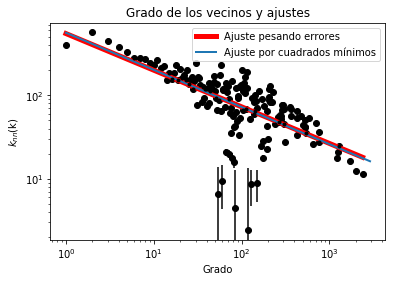

In [38]:
plt.scatter(F2[0],F2[1], color='black')
plt.errorbar(F2[0], F2[1], yerr=yerror, fmt='k.')
plt.xscale('log')
plt.yscale('log')
plt.plot(F2[0],(F2[0]**pfinal_op[1])* math.e**pfinal_op[0],c="r" ,lw=5, label="Ajuste pesando errores")
plt.plot(X,(X**-0.444173551673417)* math.e**6.327624965083439, lw=2,label="Ajuste por cuadrados mínimos")
plt.ylabel("$k_{nn}$(k)")
plt.xlabel("Grado")
plt.title("Grado de los vecinos y ajustes")
plt.legend()
plt.show()

In [44]:
data = pd.DataFrame({"Ajuste":["Pendiente","Ordenada al origen"],"Regresión lineal":[-0.444173551673417,6.327624965083439],
                     "Cuadrados mínimos":[-0.44417355,6.32762496],
                     "Con peso de errores":[-0.43835336,6.30551697]
                                        })#empty dataframe
data

,Ajuste,Regresión lineal,Cuadrados mínimos,Con peso de errores
0,Pendiente,-0.444174,-0.444174,-0.438353
1,Ordenada al origen,6.327625,6.327625,6.305517


Si bien hay diferencias al pesar el error, no resultan significativas. Se podría trabajar de forma iterativa utilizando el nuevo promedio para asignar nuevos errores, sin embargo lo que se buscaba corregir es aumentar la pendiente-en módulo- y al pesar errores se disminuye.

**iv.** Encuentre
cuantitativamente la asortatividad de la red utilizando ahora el estimador
propuesto por Newman: **r**

In [45]:
def r(Grafo):
    Enlaces_k=[]     #Lista de enlaces que también incluye los generos de los nodos del enlace              
    for n in Grafo.edges:
        Enlaces_k.append([n[0],Grafo.degree(n[0]),n[1],Grafo.degree(n[1])])
    se=[]
    for n in Enlaces_k:
        se.append(n[1]*n[3])
    Se=2*sum(se)
    
    s1=[]
    for i in NodoGrado(Grafo):
        s1.append(i[0])
    S1=sum(s1)
        
    s2=[]
    for j in NodoGrado(Grafo):
        s2.append(j[0]**2)
    S2=sum(s2)
    
    s3=[]
    for h in NodoGrado(Grafo):
        s3.append(h[0]**3)
    S3=sum(s3)
    
    return (S1*Se-S2**2)/(S1*S3-S2**2)

Calculamos el estimador de asortatividad r para las dos redes:

In [46]:
r_H=r(H) #red NetScience
r_G=r(G) #red Internet 
print(r_H,r_G)

0.4616224667525835 -0.19838487512056477


Para la red Internet el estimador r es negativo, lo que denota disasortatividad en la variable grado, es decir, que nodos de alto grado en promedio no se enlazan con nodos de alto grado, y lo mismo para nodos de bajo grado. En cambio, para la red NetScience r es positivo, dando la idea de que existe una tendencia asortativa en la variable grado.

Dadas las dos medidas de asortatividad, es decir, el exponente $𝜇$ de la ley de potencias $𝑘_{𝑛𝑛}(𝑘)=𝑎𝑘^𝜇$ propuesto por  Barabási y el estimador r de Newman (proveniente de proponer $𝑘_{𝑛𝑛}(𝑘)\sim r𝑘$); nos parece más representativo para las redes estudiadas la medida de Barabási. Esto es así ya que en las redes analizadas $𝑘_{𝑛𝑛}(𝑘)$ presentaba un comportamiento de ley de potencias y no lineal. Por lo que para estimar la asortatividad corresponde utilizar su correspondiente medida que esté asociada a un $𝑘_{𝑛𝑛}(𝑘)$ modelado por una ley de potencias y no una lineal, es decir, la medida de asortatividad $𝜇$ de Barabási. Sin embargo, los valores de r para las dos redes estudiadas hablan del mismo tipo de fenómeno de asortatividad que la medida $𝜇$ de Barabási. En otras palabras, ambos, la medida de Barabási y la de Newman, hablan de una red asortativa en grado en el caso de la red NetScience, y disasortativa en el caso de la red Internet. 

